<strong>All code has been toggled. Click below to show. There have
been extra cells added to better answer the questions.
</strong>

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click 
<a href="javascript:code_toggle()">here</a>.''')

# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [2]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [3]:
# Number of houses in the dataset
total_houses = len(housing_prices)

# Number of features in the dataset
total_features = len( housing_features[0] )

# Minimum housing value in the dataset
minimum_price = np.nanmin( housing_prices )

# Maximum housing value in the dataset
maximum_price = np.nanmax( housing_prices)

# Mean house value of the dataset
mean_price = np.nanmean(housing_prices)

# Median house value of the dataset
median_price = np.nanmedian(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.nanstd(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


Using the <tt>Seaborn</tt> package, a histogram and kernel density have been plotted below. Based on this information, if CLIENT_FEATURES fall within one deviation of the mean, the regression predictor should output a value within the approximate range [10,30].

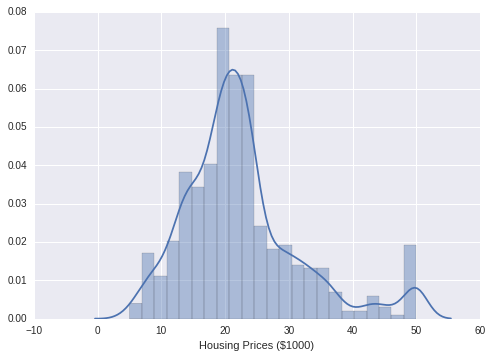

In [4]:
import seaborn as sns
import pandas as pd
prices = pd.Series( housing_prices, name="Housing Prices ($1000)")
sns.distplot(prices);


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **<br>
<table border="1" width="90%">
    <tr>
        <th>Feature</th>
        <th>Index Value</th>
        <th>Logic</th>
    </tr>
    <tr>
        <td>Crime rate</td>
        <td>0</td>
        <td>Higher crime rates in an area will result in a lowering of the property value
        </td>
    </tr>
    
    <tr>
        <td>Number of rooms</td>
        <td>5</td>
        <td>More rooms may indicate larger square footage. Also, more rooms are desirable for families versus singles.</td>
    </tr>
    
    <tr>
        <td>Distance</td>
        <td>7</td>
        <td>The closer a location is to an employment center, the price will be expected to increase. Suburbs are typically cheaper than the same square footage in a downtown townhome.</td>
    </tr>
   

</table>

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [5]:
print np.asarray(CLIENT_FEATURES)[0][[0,5,7]]

[ 11.95    5.609   1.385]


**Answer: **
\begin{eqnarray}
CrimeRate &= 11.95 \\
NumberRooms &=5.609 \\
Distance &=1.385
\end{eqnarray}

MSE: 8.2145


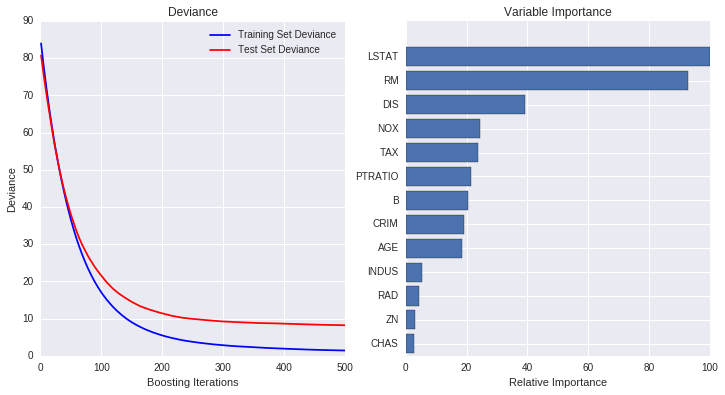

In [6]:
# This code comes from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html.
# I did take the time to retype everything as a learning exercise
# Also, the 70% training has been preserved

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
# reloaded data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state = 42)
X = X.astype(np.float32)
offset = int(X.shape[0] * .7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

#fit regression model
params = {'n_estimators':500, 'max_depth':4, 'min_samples_split':1, 
         'learning_rate':0.01, 'loss':'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse= mean_squared_error( y_test, clf.predict(X_test))
print( "MSE: %.4f" %mse)

# plot training deviance
test_score = np.zeros( (params['n_estimators'],), dtype=np.float64)

for i,y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)
    
pl.figure( figsize = (12,6))
pl.subplot(1,2,1)
pl.title("Deviance")
pl.plot( np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
       label='Training Set Deviance')
pl.plot( np.arange(params['n_estimators']) + 1, test_score, 'r-',
        label='Test Set Deviance')
pl.legend(loc='upper right')
pl.xlabel('Boosting Iterations')
pl.ylabel('Deviance')

# plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

pl.subplot(1,2,2)
pl.barh(pos, feature_importance[sorted_idx], align='center')
pl.yticks(pos, boston.feature_names[sorted_idx])
pl.xlabel('Relative Importance')
pl.title('Variable Importance')

pl.show()

In [7]:
condlist = feature_importance > 20

cl = np.append(condlist,True)

cf = [np.asarray(CLIENT_FEATURES[0])[cl[:-1]].tolist()]


In [8]:
def pick_features(x,y,client,cond):
    X = np.asarray(x)
    y = np.asarray([y])
    data = np.concatenate((X,y.T), axis=1) #join
    d = data[:,cond]
    
    cf = [np.asarray(CLIENT_FEATURES[0])[cond[:-1]].tolist()]
    hf, hp = d[:,:-1], d[:,-1]
    
    return hf,hp,cf

condlist = feature_importance > 20
hf, hp, cf = pick_features(housing_features,housing_prices,CLIENT_FEATURES,cl)    


How relavant were my feature selections when compared to an analysis of <a target="_blank" href="https://en.wikipedia.org/wiki/Gradient_boosting">Gradient Boosting</a>.

Of the the features I selected, <i>number of rooms</i> and <i>distance to employment centers</i> are within the top three features. <i>Crime</i> stood out to me, but I feel my selection was very subjective to my own beliefs. After the short analysis, its clear my intuition towards selection should be disregarded and mathematical analysis take its place.

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [9]:
# Put any import statements you need for this code block here

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    #shuffle
    np.random.seed(42)
    X = np.asarray(X)
    y = np.asarray([y])
    data = np.concatenate((X,y.T), axis=1) #join
    np.random.shuffle( data ) #shuffle
    X = data[:,:-1] #reassign
    y = data[:,-1] #reassign
    
    #split index
    train_split = lambda x: int( np.floor(len(x) * 0.7 ))
    xx_train_len = train_split(X)    
    yy_train_len = train_split(y)
    
    #assign split
    X_train = X[:xx_train_len]
    y_train = y[:yy_train_len]
    X_test = X[xx_train_len:]
    y_test = y[yy_train_len:]

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


from sklearn import cross_validation

# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    cv = cross_validation.ShuffleSplit(len(housing_prices),test_size=0.3,random_state=42)

    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."


Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
Splitting the data will give estimates of performance of an independent dataset and allows the determination of over/under fitting of the model. Splitting will also facilitate cross validation.

Splitting also allows for a number of data subsets to be generated. Effectively generating multiple training and testing sets which will facilitate better performing models and avoid over fitting erros.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [10]:
# Put any import statements you need for this code block here

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    import sklearn.metrics as skm    
    
    #ev  = skm.explained_variance_score(y_true, y_predict)
    #mae = skm.mean_absolute_error(y_true, y_predict)
    msq  = skm.mean_squared_error(y_true, y_predict)    
    #mae = skm.median_absolute_error(y_true, y_predict)
    #r2  = skm.r2_score(y_true, y_predict)
    
    # When the entire notebook is run with the performance_metric outputting 
    #  the root mean square, the model overfits! Ten parameters. When the 
    #  performance metric is the mean_squared_error, overfitting is avoided
    #  and the number of parameters is reduced to five. 
    # Perhaps the mean_squared_error is a better scoring function because it
    #  allows for a wider range of values. This should expose feature 
    #  sensitivity when the decision tree is processing.
    
    #rmsq = np.sqrt(msq)
    
        
    return msq


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
<strong>Classification Metrics</strong>
<p>
The DescisionTreeRegressor being trained in this project will output a continuous variable. The nature of the classifier will prevent the use of any classification metrics.
</p>
<ol>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1</li>
</ol>
<br>
<strong>Regression Metrics</strong><br>

<p>
Each of the regression metrics listed below were implemented and evaluated.My top three have been numbered. Although the $R^2$ value is labed as third choice, this metric should be used in conjuction with the error function. Each serves a slightly different purpose and both are needed to better understand the trained model.
</p>
<ol>
    <li>Explained Variance</li>
    <li>Mean Absolute Error</li>
    <li>Mean Square Error</li>
    <li>Root Mean Square Error<b> (1)</b></li>
            <ul>
                 <li> Squared nature of the metric helps to deliver more robust results which prevents cancelling the positive and negative error values. Displays the plausible magnitude of error term.
                 </li>
                 <li> With more samples reconstructing the error distribution using RMSE is considered to be more reliable.
                 </li>
                 <li> RMSE is <i>highly affected by outliers</i>
                 </li>
                 <li> Compared to Mean Absolute Error, RMSE gives higher weightage and punishes large errors.
                 </li>
                 <li>
                     <a target="_blank" href="http://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/">Source: Analytics Vidhya</a>
                 </li>
            </ul>
    <li>Median Absolute Error <b> (2)</b>: 
        <a target="_blank" href="http://scikit-learn.org/stable/modules/model_evaluation.html">Robust to outliers!</a>
    </li>
    <li>$R^2$ Coefficient of Determination<b> (3)</b></li>









































































## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [11]:
# Put any import statements you need for this code block
import sklearn.metrics as skm
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
 
    
    
    # Make an appropriate scoring function
    scoring_function = skm.make_scorer(performance_metric,
                                       greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor,parameters,scoring_function,cv=cv)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_



# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    reg2 = fit_model(hf,hp)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."
    

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
The grid search algorithm is a method of testing a set of vector parameters over the model conditions to locate the best model based upon the user's scoring function. This is a brute force search. When mutliple sets of parameters are passed, the outer (cartesian) product is computed and used as the set of input parameters to test over. 

Grid search seems applicable appears to be applicable in prototyping models. A self-tuning parameter estimator may have longer execution times but result in a better predictive model.

https://en.wikipedia.org/wiki/Hyperparameter_optimization

http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html



## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
Cross-validation is the process of splitting the data into multiple subsets of traning and testing data. In the manner, the model can be evaluated across multiple randomized instances of the same data to gain a deeper understanding of model performance.

Each of the folds is evaluated and the average of outputs is determined.
http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [12]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [13]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    
    # Plot of the relative error
    diff_err = (test_err-train_err)
    pl.plot(max_depth, diff_err,lw=2, label='Test-Train')
    
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/home/miles/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


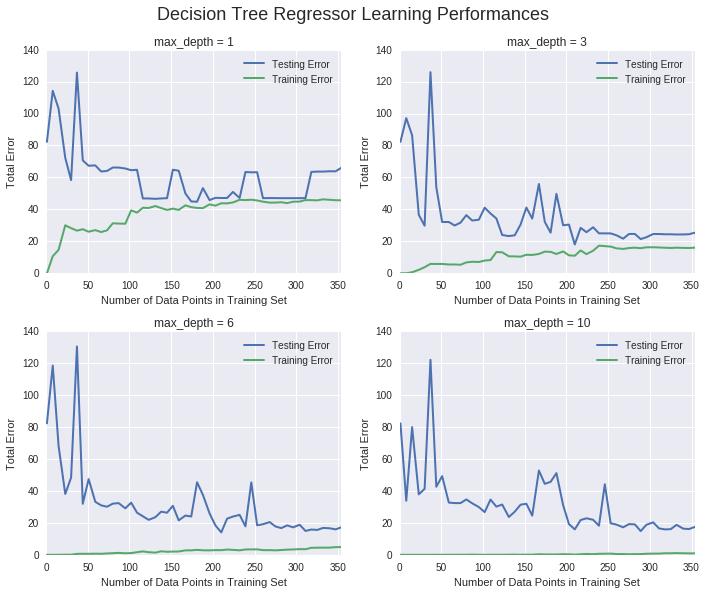

In [14]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **<br>
<b>max_depth = 3</b><br>
As the trainging set size increases, the training error increases and the testing error decreases. There appears to be a limit near 250 where the difference between training and testing error is near constant.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **<br>
<b>max_depth = 1</b>: High Bias, Low Variance. High bias is exhibited in the high error on the training sets. Low variance shows poor generalization and not enough focus on data.
<br>
<b>max_depth = 10</b>:Low Bias, High Variance. Low bias due to the low error on training set but high variance due to overfitting.

Creating a model complexity graph. . . 


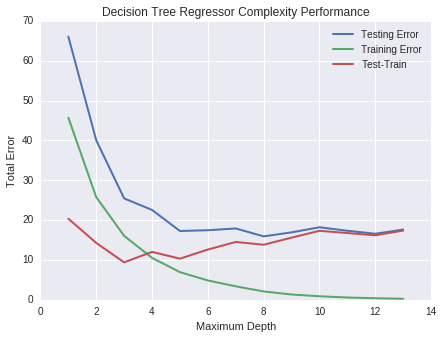

In [15]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
To better answer the question, a third plot was added. The 'Test-Train' line indicates the difference between Testing and Training error. Based on the information represented, a maximum depth of either 3 or 4 would best generalize the data.

Why? As the max depth increases, the model continues to minimze the error. However, the tunes the model and avoids abstraction. 

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [16]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 5


In [17]:
print "Final model has an optimal max_depth parameter of", reg2.get_params()['max_depth']

Final model has an optimal max_depth parameter of 7


**Answer: **
The above results are from two different models. <tt>reg</tt> is the model accounting for all data and <tt>reg2</tt> is modeling with only 7 features; the features chosen came from the GradientBoosting method.
<br>
The standard model (<tt>reg</tt>) has used approximately 30% of coefficents when compared to number of features available. This seems to indicate that a reasonable generalization of the data has occured.
<br>
The feature selected model appears to overfit. It matches the coefficients to each of the features and produces a model with 7 parameters. Perhaps the model <strong>should</strong> be trained on all features and then those that are deemed unimportant set to zero in the client vector.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [18]:
print 'ALL FEATURES'
sale_price = reg.predict(CLIENT_FEATURES)

print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

z_score = (sale_price-mean_price) / std_dev

print "Z-score of predicted sale price: {0:.3f}".format(z_score[0])


ALL FEATURES
Predicted value of client's home: 20.968
Z-score of predicted sale price: -0.170


In [19]:
print 'SELECTED FEATURES'
#sale_price = reg.predict(CLIENT_FEATURES)
sale_price = reg2.predict(cf)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

z_score = (sale_price-mean_price) / std_dev

print "Z-score of predicted sale price: {0:.3f}".format(z_score[0])

SELECTED FEATURES
Predicted value of client's home: 19.997
Z-score of predicted sale price: -0.276


**Answer: **
Each of the predicted selling prices above appears to be reasonable. These values sit behind the mean on the distribution but fall within a standard deviation. Either of these values seem valid based upon initial inspection of the data histogram and statistics.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

No way! This data was collected in 1978. Also, a bit of exploration has shown that there exist many possible ways to tune the model. In this exercise, tuning was manipulated by hand. Although sufficent for a beginner, automating the tuning would be a better approach by coupling some sort of randomization or fitness/loss function to the regressor.
<br>
The plot below has been copied from the sklearn documentation. It shows that the prediction variation between the full feature decision tree and selected feature decision tree. The general outcome of either predictor appears to be statistically similiar. Purple color indicates the same prediction from either regressor.
<br>
Perhaps the dataset needs the outliers cleaned up and then retrained. Both models seem sufficient to price homes that cluster near the median value of the dataset. However, but models vary with the outliers. Again, I would not use this as the final tool for pricing. This would be a great supplemental piece of information for the listing agent when determining market value for the home.

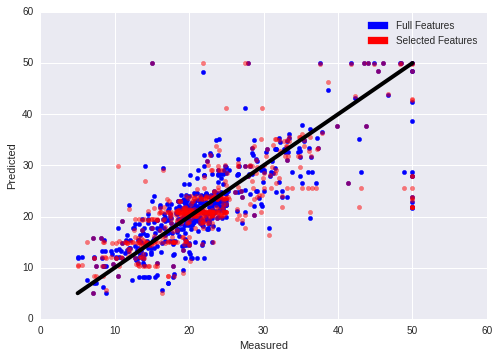

In [20]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict

reg = DecisionTreeRegressor()
boston = datasets.load_boston()
y = boston.target

predicted = cross_val_predict(reg, boston.data, y, cv=10)
predicted2 = cross_val_predict(reg2, boston.data,y, cv=10)

fig, ax = pl.subplots()
ax.scatter(y, predicted,color='blue')
ax.scatter(y, predicted2, color='red',alpha=0.5)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k-',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue',label='Full Features')
red_patch = mpatches.Patch(color='red',label='Selected Features')
pl.legend(handles=[blue_patch,red_patch])

pl.show()